In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12,8]

In [2]:
def bandmodel(nuvec, heightsum, nu0, dnu):
    #return flat_model(nuvec,heightsum, nu0, dnu)
    return logistic_model(nuvec,heightsum, nu0, dnu)

def logistic_model(nuvec, heightsum, nu0,dnu):
    '''Returns a logistic-function band model given inputs
    
      nuvec:  vector of frequencies at which to return the function
      heightsum: the desired "integral" of the band, really a sum over elements.
      nu0:  center frequency
      dnu:  bandwidth
      
    '''
    low = nu0-dnu/2
    high = nu0+dnu/2
    # I tuned aa and nn by hand to "best fit by eye" (globally) 
    # the bands Sara provided in the first plot below.
    aa = 2     # smaller aa gives broader tails at all frequency bands
    nn = 0.7   # larger nn gives broader tails at higher frequency bands
    k1 = aa*(20/low)**nn
    f1 = 1/(1+np.exp(-k1*(nuvec-low )))
    k2 = aa*(20/high)**nn
    f2 = 1-1/(1+np.exp(-k2*(nuvec-high)))
    f = f1*f2
    f = (heightsum/np.sum(f))*f
    return f

def flat_model(nuvec, heightsum, nu0,dnu):
    '''Returns a flat band model given inputs
    
      nuvec:  vector of frequencies at which to return the function
      heightsum: the desired "integral" of the band, really a sum over elements.
      nu0:  center frequency
      dnu:  bandwidth
      
    '''
    low = nu0-dnu/2
    high = nu0+dnu/2

    f = np.where((nuvec>low)&(nuvec<high), 1, 0)
    f = (heightsum/np.sum(f))*f
    return f

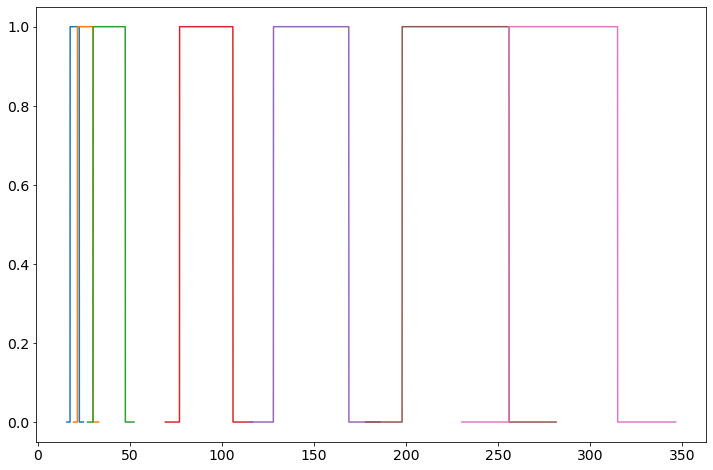

In [3]:
savedir = 'config/FlatBands/'
band_info = {}
#band_info['ULF_1'] =  {'band_center':  20.0, 'fractional_bandwidth': 0.250}
band_info['ULF_1'] =  {'band_center':  20.0, 'fractional_bandwidth': 0.25}
band_info['LF_1'] =  {'band_center':  25.75, 'fractional_bandwidth': 0.330}
band_info['LF_2'] =  {'band_center':  38.75, 'fractional_bandwidth': 0.452}
band_info['MF_1'] =  {'band_center':  91.5,  'fractional_bandwidth': 0.317}
band_info['MF_2'] =  {'band_center': 148.5,  'fractional_bandwidth': 0.276}
band_info['HF_1'] =  {'band_center': 227.0,  'fractional_bandwidth': 0.256}
band_info['HF_2'] =  {'band_center': 285.5,  'fractional_bandwidth': 0.207}

nustep = 0.02 #GHz
for band in band_info.keys():
    nu_c = band_info[band]['band_center']
    dnu = nu_c*band_info[band]['fractional_bandwidth']/2.0
    lowedge = nu_c - dnu
    highedge = nu_c + dnu
    
    nuvec = np.arange( np.round(0.9*lowedge,decimals=1), np.round(1.1*highedge,decimals=1), nustep)
    bandshape = np.where((nuvec>lowedge)&(nuvec<highedge),1,0)
    #bandshape = np.exp(-(nuvec - nu_c)**2/(2*(dnu/3)**2))
    bandshape_dist = np.zeros(len(bandshape))
    plt.plot(nuvec,bandshape)
    savevec = np.transpose([nuvec, 0.5*bandshape,bandshape_dist])
    
    filename = savedir+band+'_p5.txt'
    np.savetxt(filename,savevec,fmt='%.4f')
    


In [22]:
np.transpose(savevec)

array([[230.4, 230.5, 230.6, ..., 346.3, 346.4, 346.5],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])